### 놀이기구 만들기

* 지난 시간에는 모터의 원운동을 직선 운동으로 전환하는 방식으로 4족 보행 로봇을 만들었다면
* 이제는 2개의 모터에 달린 바퀴를 원운동으로 움직이는 방식으로
* 우리가 놀이공원에서 경험했던
* 놀이기구를 만들어보자!

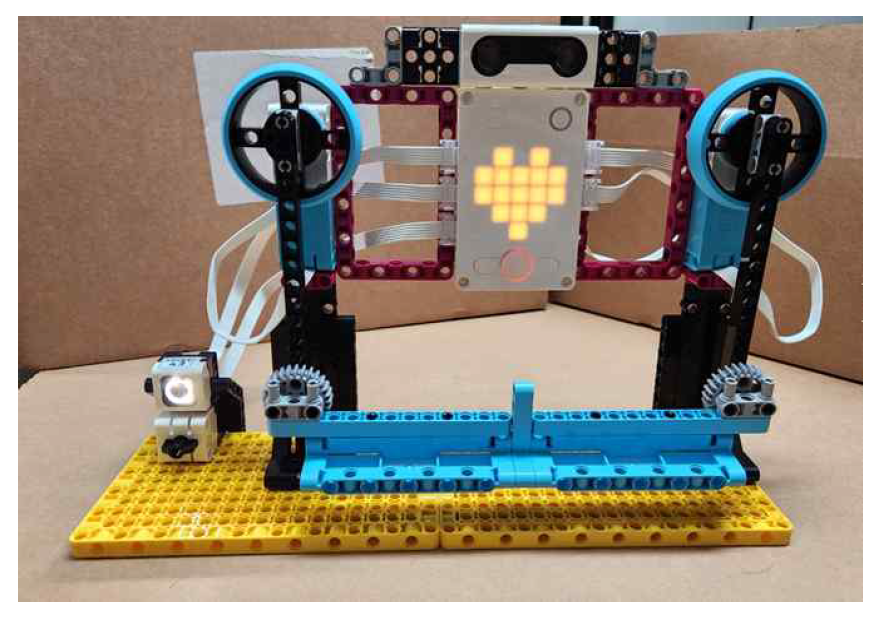

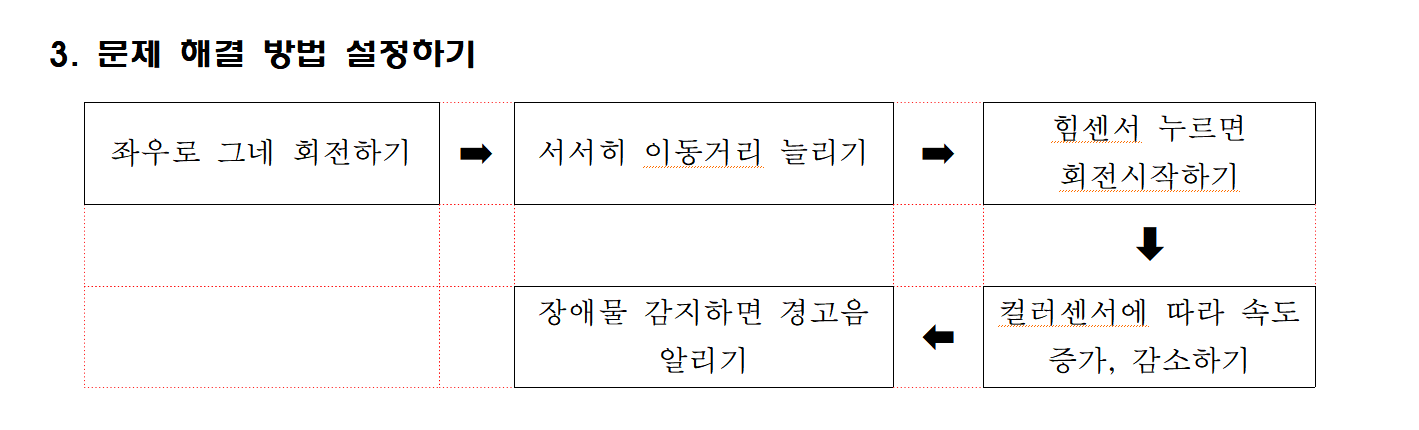

In [ ]:
# 1. 좌우로 그네 회전하기

#스파이크 프라임 라이브러리 불러오기
from spike import PrimeHub, ForceSensor, ColorSensor, DistanceSensor, Motor, MotorPair
from spike.control import wait_for_seconds


#허브, 센서, 엑추에이터 초기화
hub = PrimeHub()
force = ForceSensor('')
color=ColorSensor('')
distance = DistanceSensor('')
motor=MotorPair('', '')
motor_a=Motor('')
motor_b=Motor('')

#움직임 관련 변수 초기값 설정
speed=10
dis = 20

#모터 위치 초기화
motor_a.run_to_position(0)
motor_b.run_to_position(0)

#동일한 간격으로 좌우로 움직이는 그네 동작 설정
motor.move_tank(50,'degrees', -30, 30)
while True:
    motor.move_tank(100,'degrees', -30,30) #좌 (시계 반대)
    motor.move_tank(100,'degrees', 30,-30) #우

In [ ]:
# 2. 서서히 그네 이동거리 늘리기

#스파이크 프라임 라이브러리 불러오기
from spike import PrimeHub, ForceSensor, ColorSensor, DistanceSensor, Motor, MotorPair
from spike.control import wait_for_seconds


#허브, 센서, 엑추에이터 초기화
hub = PrimeHub()
force = ForceSensor('')
color=ColorSensor('')
distance = DistanceSensor('')
motor=MotorPair('', '')
motor_a=Motor('')

motor_b=Motor('')

#움직임 관련 변수 초기값 설정
speed=10
dis = 20

#모터 위치 초기화
motor_a.run_to_position(0)
motor_b.run_to_position(0)

#이동거리를 서서히 증가시키기
motor.move_tank(dis,'degrees', -30, 30)
while True:
  for dis in range(40, 250, 50):
      motor.move_tank(dis,'degrees', 30,-30)
      motor.move_tank(dis+20,'degrees', -30, 30)

  #이동거리가 최고 지점에 도달했다면 같은 거리로 일정 시간 동안 좌우로 움직이게 하기

  for i in range(5):
    motor.move_tank(dis,'degrees', 30, -30)
    motor.move_tank(dis,'degrees', -30, 30)
  tmp = dis

  #이동거리가 서서히 줄어들도록 이동거리를 일정 간격으로 줄여줌

  for dis in range(tmp, 0, -50):
    print(dis)
    motor.move_tank(dis, 'degrees', 30, -30)
    motor.move_tank(dis-20, 'degrees', -30, 30)



In [ ]:
# 3. 힘센서 누르면 움직임 시작하기

#스파이크 프라임 라이브러리 불러오기
from spike import PrimeHub, ForceSensor, ColorSensor, DistanceSensor, Motor, MotorPair
from spike.control import wait_for_seconds


#허브, 센서, 엑추에이터 초기화
hub = PrimeHub()
force = ForceSensor('')
color=ColorSensor('')
distance = DistanceSensor('')
motor=MotorPair('', '')
motor_a=Motor('')
motor_b=Motor('')

#움직임 관련 변수 초기값 설정
speed=10
dis = 20

#모터 위치 초기화
motor_a.run_to_position(0)
motor_b.run_to_position(0)

#이동거리를 서서히 증가시키기
motor.move_tank(dis,'degrees', -30, 30)
while True:
  #force.wait_until_pressed()#
  for dis in range(40, 250, 50):
      motor.move_tank(dis,'degrees', 30,-30)
      motor.move_tank(dis+20,'degrees', -30, 30)

  #이동거리가 최고 지점에 도달했다면 같은 거리로 일정 시간 동안 좌우로 움직이게 하기

  for i in range(5):
    motor.move_tank(dis,'degrees', 30, -30)
    motor.move_tank(dis,'degrees', -30, 30)
  tmp = dis

  #이동거리가 서서히 줄어들도록 이동거리를 일정 간격으로 줄여줌

  for dis in range(tmp, 0, -50):
    print(dis)
    motor.move_tank(dis, 'degrees', 30, -30)
    motor.move_tank(dis-20, 'degrees', -30, 30)



In [ ]:
# 4. 컬러센서 감지 값에 따라 속도 빠르게, 느리게 하기

#스파이크 프라임 라이브러리 불러오기
from spike import PrimeHub, ForceSensor, ColorSensor, DistanceSensor, Motor, MotorPair
from spike.control import wait_for_seconds


#허브, 센서, 엑추에이터 초기화
hub = PrimeHub()
force = ForceSensor('')
color=ColorSensor('')
distance = DistanceSensor('')
motor=MotorPair('', '')
motor_a=Motor('')
motor_b=Motor('')

#움직임 관련 변수 초기값 설정
speed=10
dis = 20

#모터 위치 초기화
motor_a.run_to_position(0)
motor_b.run_to_position(0)

#빨간색 속도를 10만큼 증가시키기

def ck_red(speed):
    if color.get_color()=='red':
        speed=speed+10
        print('red:', speed)           # 확인을 위해 출력
    return speed

#파란색 속도를 10만큼 감소시키기

def ck_blue(speed):
    if color.get_color()=='blue':
        speed=speed-10
    return speed


#이동거리를 서서히 증가시키기
motor.move_tank(dis,'degrees', -30, 30)
while True:
  force.wait_until_pressed()
  motor.move_tank(dis,'degrees', speed*(-1), speed)

  for dis in range(40, 250, 50):
      speed = ck_red(speed)
      speed = ck_blue(speed)
      motor.move_tank(dis,'degrees', speed,-speed)
      motor.move_tank(dis+20,'degrees', -speed, speed)

  #이동거리가 최고 지점에 도달했다면 같은 거리로 일정 시간 동안 좌우로 움직이게 하기

  for i in range(5):
    speed = ck_red(speed)
    speed = ck_blue(speed)
    motor.move_tank(dis,'degrees', speed,-speed)
    motor.move_tank(dis+20,'degrees', -speed, speed)
  tmp = dis

  #이동거리가 서서히 줄어들도록 이동거리를 일정 간격으로 줄여줌

  for dis in range(tmp, 0, -50):

    speed = ck_red(speed)
    speed = ck_blue(speed)
    motor.move_tank(dis,'degrees', speed,-speed)
    motor.move_tank(dis+20,'degrees', -speed, speed)



In [ ]:
# 5. 장애물 감지하면 경고음 올리기

#스파이크 프라임 라이브러리 불러오기
from spike import PrimeHub, ForceSensor, ColorSensor, DistanceSensor, Motor, MotorPair
from spike.control import wait_for_seconds


#허브, 센서, 엑추에이터 초기화
hub = PrimeHub()
force = ForceSensor('C')
color=ColorSensor('B')
distance = DistanceSensor('A')
motor=MotorPair('E', 'F')
motor_a=Motor('E')
motor_b=Motor('F')

#움직임 관련 변수 초기값 설정
speed=30
dis = 20

#모터 위치 초기화
motor_a.run_to_position(0)
motor_b.run_to_position(0)

#빨간색 속도를 10만큼 증가시키기

def ck_red(speed):
    if color.get_color()=='red':
        speed=speed+10
        print('red:', speed)        # 확인을 위해 출력
    return speed

#파란색 속도를 10만큼 감소시키기

def ck_blue(speed):
    if color.get_color()=='blue':
        speed=speed-10
    return speed

#거리 감지하여 장애물 있으면 경고움 울리기
def ck_distance():
    ck_dis =distance.get_distance_cm()
    print('거리',ck_dis)
    if ck_dis<=7:
        hub.speaker.beep(60, 0.5)


#이동거리를 서서히 증가시키기
motor.move_tank(dis,'degrees', -30, 30)
while True:
    force.wait_until_pressed()
    motor.move_tank(dis,'degrees', speed*(-1), speed)

    for dis in range(40, 250, 50):
        speed = ck_red(speed)
        speed = ck_blue(speed)
        ck_distance()
        motor.move_tank(dis,'degrees', speed,-speed)
        motor.move_tank(dis+20,'degrees', -speed, speed)

    #이동거리가 최고 지점에 도달했다면 같은 거리로 일정 시간 동안 좌우로 움직이게 하기

    for i in range(5):
        speed = ck_red(speed)
        speed = ck_blue(speed)
        ck_distance()
        motor.move_tank(dis,'degrees', speed,-speed)
        motor.move_tank(dis+20,'degrees', -speed, speed)
    tmp = dis

    #이동거리가 서서히 줄어들도록 이동거리를 일정 간격으로 줄여줌

    for dis in range(tmp, 0, -50):

        speed = ck_red(speed)
        speed = ck_blue(speed)
        ck_distance()
        motor.move_tank(dis,'degrees', speed,-speed)
        motor.move_tank(dis+20,'degrees', -speed, speed)

